<a href="https://colab.research.google.com/github/arcadiopfz/Projeto-Final/blob/main/Etapa_1_Ferramentas_de_TCC_1_PRIO_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1 - Análise exploratória: Pré-processamento e visualização do conjunto de dados da ação da Petro Rio SA (PRIO3)


# 1. Instalação da Biblioteca yFinance

In [ ]:
!pip install -q yfinance
import yfinance as yf

*   yfinance -> Download market data from Yahoo! Finance API

*   pip install -> O pip install vai instalar uma biblioteca específica que você queira, lembrando que as bibliotecas só precisam ser instaladas uma única vez, depois você só vai precisar importar no seu código se for utilizá-la.

*   ! -> para não sair da interface do colab/jupyter, assim não precisa instalar no pront do colab/jupyter



# 2. Importação de bibliotecas 

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

 **Biblioteca para uso em Python, open-source e de uso gratuito :**
*   pandas ->  que fornece ferramentas para análise e manipulação de dados (tabelas e memórias para acessar as informações e gerar estatíticas).
*   numpy-> científica que possui funções matemáticas principalmente cálculo de média desvio padrão manipulação de matrizes e vetores.
*   from pandas_datareader import data -> função que nós vamos utilizar para carregar dados financeiros online. -> Essa é uma das maneiras mais utilizadas no Python para você buscar dados da internet.
*   matplotlib.pyp -> Biblioteca de visualização padrão Python.
*   seaborn -> possui gráficos mais avançados com uma visualização mais atraente para nós visualizar os dados das ações 
*  plotly.express -> biblioteca para nós gerarmos gráficos interativos
*   datetime -> fornece as classes para manipulação de datas e horas










# 3. Criar Base de dados com uma ação (no caso a PRIO.SA)

## 3.1. Carregar os dados no Yahoo! Finance API, até o dia de hoje:  

In [ ]:
prio_df = yf.download("PRIO3.SA") 

[*********************100%***********************]  1 of 1 completed


In [ ]:
prio_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-10-25 00:00:00-02:00,24.100000,24.400000,22.100800,23.340000,23.340000,25180000
2010-10-26 00:00:00-02:00,22.800200,23.400000,22.500000,22.500000,22.500000,7200000
2010-10-27 00:00:00-02:00,22.500000,23.200001,22.202400,22.700001,22.700001,3685000
2010-10-28 00:00:00-02:00,22.709999,22.709999,22.100000,22.500000,22.500000,2900000
2010-10-29 00:00:00-02:00,22.600000,22.900000,22.400000,22.740000,22.740000,825000
...,...,...,...,...,...,...
2023-01-18 00:00:00-03:00,39.209999,39.779999,38.919998,38.970001,38.970001,9918100
2023-01-19 00:00:00-03:00,38.820000,40.540001,38.520000,40.520000,40.520000,10453000
2023-01-20 00:00:00-03:00,40.310001,41.490002,39.529999,41.099998,41.099998,12920300


## 3.2. Carregar os dados no Yahoo! Finance API, entre datas (de 2015 até 2022):

In [ ]:
prio_df = yf.download("PRIO3.SA", start='2015-01-01', end='2022-12-31') 

[*********************100%***********************]  1 of 1 completed


In [ ]:
prio_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02 00:00:00-02:00,0.460000,0.467000,0.440000,0.440000,0.440000,840000
2015-01-05 00:00:00-02:00,0.436000,0.438000,0.407000,0.407000,0.407000,1912000
2015-01-06 00:00:00-02:00,0.407000,0.419000,0.367000,0.367000,0.367000,2154000
2015-01-07 00:00:00-02:00,0.375000,0.389000,0.365000,0.366000,0.366000,1501000
2015-01-08 00:00:00-02:00,0.383000,0.383000,0.365000,0.378000,0.378000,1622000
...,...,...,...,...,...,...
2022-12-23 00:00:00-03:00,35.950001,36.049999,35.360001,35.490002,35.490002,7403800
2022-12-26 00:00:00-03:00,35.200001,35.580002,35.000000,35.439999,35.439999,4152200
2022-12-27 00:00:00-03:00,35.689999,35.869999,35.209999,35.580002,35.580002,12627800


## 3.3.Informações sobre a base de dados

In [ ]:
prio_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1988 entries, 2015-01-02 00:00:00-02:00 to 2022-12-29 00:00:00-03:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1988 non-null   float64
 1   High       1988 non-null   float64
 2   Low        1988 non-null   float64
 3   Close      1988 non-null   float64
 4   Adj Close  1988 non-null   float64
 5   Volume     1988 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 173.3 KB


##3.4. Convert Volume type to float

In [ ]:
prio_df['Volume'] = prio_df['Volume'].astype(float)

In [ ]:
prio_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1988 entries, 2015-01-02 00:00:00-02:00 to 2022-12-29 00:00:00-03:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1988 non-null   float64
 1   High       1988 non-null   float64
 2   Low        1988 non-null   float64
 3   Close      1988 non-null   float64
 4   Adj Close  1988 non-null   float64
 5   Volume     1988 non-null   float64
dtypes: float64(6)
memory usage: 173.3 KB


## 3.5. Os 5 primeros e 5 últimos registros 

In [ ]:
prio_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02 00:00:00-02:00,0.460,0.467,0.440,0.440,0.440,840000.0
2015-01-05 00:00:00-02:00,0.436,0.438,0.407,0.407,0.407,1912000.0
2015-01-06 00:00:00-02:00,0.407,0.419,0.367,0.367,0.367,2154000.0
2015-01-07 00:00:00-02:00,0.375,0.389,0.365,0.366,0.366,1501000.0
2015-01-08 00:00:00-02:00,0.383,0.383,0.365,0.378,0.378,1622000.0


In [ ]:
prio_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23 00:00:00-03:00,35.950001,36.049999,35.360001,35.490002,35.490002,7403800.0
2022-12-26 00:00:00-03:00,35.200001,35.580002,35.000000,35.439999,35.439999,4152200.0
2022-12-27 00:00:00-03:00,35.689999,35.869999,35.209999,35.580002,35.580002,12627800.0
2022-12-28 00:00:00-03:00,35.680000,37.490002,35.580002,37.250000,37.250000,10775200.0
2022-12-29 00:00:00-03:00,37.250000,37.480000,36.619999,37.209999,37.209999,7890300.0


## 3.6. Informações estatíticas sobre a base de dados

In [ ]:
prio_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1.988000e+03
mean,7.623633,7.809426,7.439229,7.620915,7.620915,9.696162e+06
std,9.835811,10.057461,9.615633,9.832142,9.832142,1.145487e+07
min,0.139000,0.150000,0.137000,0.138000,0.138000,0.000000e+00
25%,0.534950,0.549500,0.518250,0.537300,0.537300,1.375000e+06
50%,2.270000,2.327000,2.200200,2.261000,2.261000,4.946500e+06
75%,13.764000,14.296000,13.522000,13.769500,13.769500,1.494982e+07
max,38.570000,39.250000,37.459999,38.500000,38.500000,1.619380e+08


## 3.7. Verificar se existem valores nulos em cada uma dessas ações e se positivo tratar os mesmos.

In [ ]:
prio_df.isnull()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02 00:00:00-02:00,False,False,False,False,False,False
2015-01-05 00:00:00-02:00,False,False,False,False,False,False
2015-01-06 00:00:00-02:00,False,False,False,False,False,False
2015-01-07 00:00:00-02:00,False,False,False,False,False,False
2015-01-08 00:00:00-02:00,False,False,False,False,False,False
...,...,...,...,...,...,...
2022-12-23 00:00:00-03:00,False,False,False,False,False,False
2022-12-26 00:00:00-03:00,False,False,False,False,False,False
2022-12-27 00:00:00-03:00,False,False,False,False,False,False


In [ ]:
prio_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Não existem valores nulos, mas se existisse teriamos que excutar a seguinte linha de código:**

In [ ]:
# prio_df.dropna(inplace=True)

Saber o o que tem na nossa base -> usando o shape:

In [ ]:
prio_df.shape

(1988, 6)

## 3.8. Salvar essa base de dados PRIO em  CSV no Goolge Drive:

In [ ]:
prio_df.to_csv('prio.csv')

## 3.9. Resgatar/Carregar a base de dados PRIO em CSV do Google drive com somente a coluna DATE e CLOSE

Agora o indíce muda para  de 0 até 1987 e não é mais a data, ver item 3.2.  

In [ ]:
prio_df2 = pd.read_csv('/content/prio.csv')[['Date','Close']]
prio_df2

,Date,Close
0,2015-01-02 00:00:00-02:00,0.440000
1,2015-01-05 00:00:00-02:00,0.407000
2,2015-01-06 00:00:00-02:00,0.367000
3,2015-01-07 00:00:00-02:00,0.366000
4,2015-01-08 00:00:00-02:00,0.378000
...,...,...
1983,2022-12-23 00:00:00-03:00,35.490002
1984,2022-12-26 00:00:00-03:00,35.439999
1985,2022-12-27 00:00:00-03:00,35.580002
1986,2022-12-28 00:00:00-03:00,37.250000


In [ ]:
prio_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1988 non-null   object 
 1   Close   1988 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.2+ KB


In [ ]:
prio_df2.describe()

,Close
count,1988.000000
mean,7.620915
std,9.832142
min,0.138000
25%,0.537300
50%,2.261000
75%,13.769500
max,38.500000


# 4. Visualização dos dados

## 4.1. Criando um gráfico de histórico do preço da ação PRIO.SA

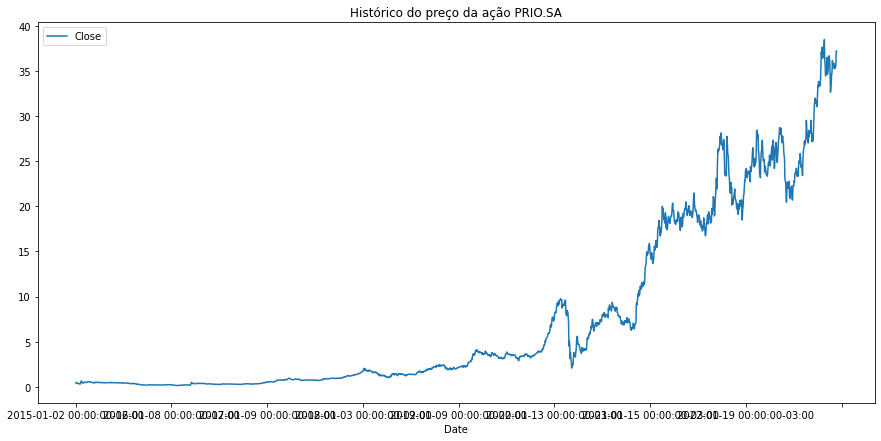

In [ ]:
prio_df2.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço da ação PRIO.SA');

In [ ]:
prio_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1988 non-null   object 
 1   Close   1988 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.2+ KB


A informação no eixo X está sobreposta --> date é um objecto 

## 4.2. Convertendo Dates and Times

In [ ]:
prio_df2['Date'] = pd.to_datetime(prio_df2['Date'],utc=True)
prio_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    1988 non-null   datetime64[ns, UTC]
 1   Close   1988 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 31.2 KB


In [ ]:
prio_df2

,Date,Close
0,2015-01-02 02:00:00+00:00,0.440000
1,2015-01-05 02:00:00+00:00,0.407000
2,2015-01-06 02:00:00+00:00,0.367000
3,2015-01-07 02:00:00+00:00,0.366000
4,2015-01-08 02:00:00+00:00,0.378000
...,...,...
1983,2022-12-23 03:00:00+00:00,35.490002
1984,2022-12-26 03:00:00+00:00,35.439999
1985,2022-12-27 03:00:00+00:00,35.580002
1986,2022-12-28 03:00:00+00:00,37.250000


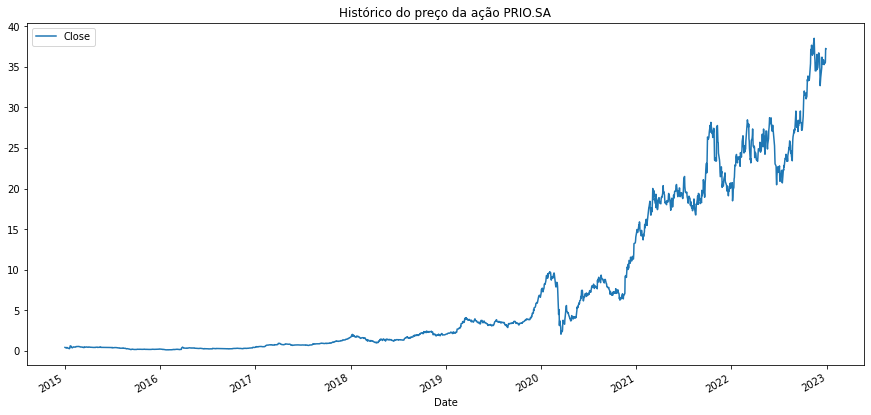

In [ ]:
prio_df2.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço da ação PRIO.SA');
#p.label(x="Data", y="Valor em Reais")

## 4.3. Criando um histograma da ação PRIO.SA para verificar a maior incidência dos valores históricos 

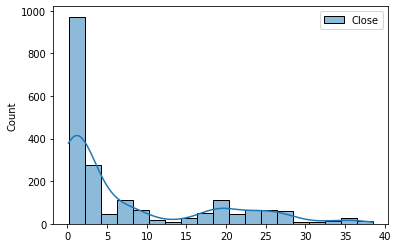

In [ ]:
sns.histplot(prio_df2, kde = True ); 
#p.label(x="Valor em Reais", y="Número de dias ação ficou na faixa de preço ")

4.4. Salvar essa base de dados **prio_df2** em CSV no Goolge Drive:



In [ ]:
prio_df.to_csv('prio2.csv')

## 5. Comparando o histórico do preço da ação PRIO.SA (PRIO3.SA) com: 

*   Ibovespa Fundo de Índice (BOVA11.SA)
*   Cosan (CSAN3.SA)
*   Petrobras (PETR3.SA, PETR4.SA)
*   Pet Manguinhos (RPMG.SA)
*   Ultrapar (UGPA3.SA)




## 5.1. Carregar os dados no Yahoo! Finance API, até o dia de hoje:

In [ ]:
acoes = ['PRIO3.SA', 'BOVA11.SA', 'PETR4.SA','PETR3.SA','CSAN3.SA','CSAN3.SA', 'UGPA3.SA' ]

In [ ]:
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = yf.download(acao, start='2015-01-01', end ='2022-12-31')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# 5.2. Informações sobre a base de dados

In [ ]:
acoes_df

,PRIO3.SA,BOVA11.SA,PETR4.SA,PETR3.SA,CSAN3.SA,UGPA3.SA
Date,,,,,,
2015-01-02 00:00:00-02:00,0.440000,47.259998,9.360000,9.000000,6.950000,25.330000
2015-01-05 00:00:00-02:00,0.407000,46.320000,8.560000,8.270000,6.537500,24.655001
2015-01-06 00:00:00-02:00,0.367000,46.580002,8.280000,8.060000,6.280000,24.690001
2015-01-07 00:00:00-02:00,0.366000,48.150002,8.670000,8.450000,6.372500,25.360001
2015-01-08 00:00:00-02:00,0.378000,48.509998,9.230000,9.020000,6.450000,25.100000
...,...,...,...,...,...,...
2022-12-23 00:00:00-03:00,35.490002,106.000000,25.120001,28.559999,17.290001,12.840000
2022-12-26 00:00:00-03:00,35.439999,105.150002,24.940001,28.469999,16.770000,12.350000
2022-12-27 00:00:00-03:00,35.580002,104.900002,25.110001,28.660000,16.910000,12.280000


In [ ]:
acoes_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1988 entries, 2015-01-02 00:00:00-02:00 to 2022-12-29 00:00:00-03:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRIO3.SA   1988 non-null   float64
 1   BOVA11.SA  1988 non-null   float64
 2   PETR4.SA   1988 non-null   float64
 3   PETR3.SA   1988 non-null   float64
 4   CSAN3.SA   1988 non-null   float64
 5   UGPA3.SA   1988 non-null   float64
dtypes: float64(6)
memory usage: 173.3 KB


In [ ]:
acoes_df.isnull().sum()

PRIO3.SA     0
BOVA11.SA    0
PETR4.SA     0
PETR3.SA     0
CSAN3.SA     0
UGPA3.SA     0
dtype: int64

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#plt.figure(figsize=(16,8))
#plt.xlabel('Registros', fontsize=18)
#plt.ylabel('Valores em Reais', fontsize= 18)
#plt.yticks(np.arange(-50, 1000, 50))
#plt.plot(df2);

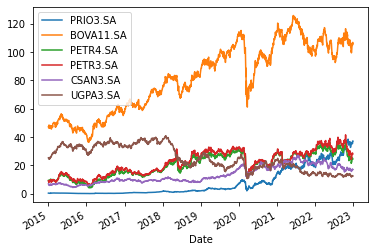

In [ ]:
acoes_df.plot();

# 5.3. Normalizar os dados para análise do crescimento das ações 

In [ ]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns[0:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [ ]:
acoes_df_normalizado

,PRIO3.SA,BOVA11.SA,PETR4.SA,PETR3.SA,CSAN3.SA,UGPA3.SA
Date,,,,,,
2015-01-02 00:00:00-02:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05 00:00:00-02:00,0.925000,0.980110,0.914530,0.918889,0.940647,0.973352
2015-01-06 00:00:00-02:00,0.834091,0.985612,0.884615,0.895556,0.903597,0.974734
2015-01-07 00:00:00-02:00,0.831818,1.018832,0.926282,0.938889,0.916906,1.001184
2015-01-08 00:00:00-02:00,0.859091,1.026449,0.986111,1.002222,0.928058,0.990920
...,...,...,...,...,...,...
2022-12-23 00:00:00-03:00,80.659095,2.242912,2.683761,3.173333,2.487770,0.506909
2022-12-26 00:00:00-03:00,80.545452,2.224926,2.664530,3.163333,2.412950,0.487564
2022-12-27 00:00:00-03:00,80.863641,2.219636,2.682692,3.184444,2.433094,0.484801


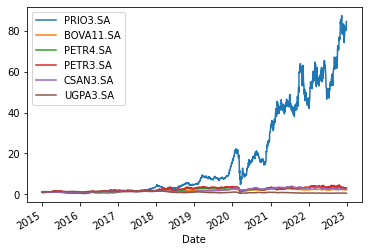

In [ ]:
acoes_df_normalizado.plot()